### 12-30-17

- add regularization

### 12-29-17

- basic example not encluded regularization

In [1]:
import numpy as np
import pandas as pd
%pylab inline 
from scipy.stats import norm as gaussian 
from scipy.misc import logsumexp

Populating the interactive namespace from numpy and matplotlib


# sample

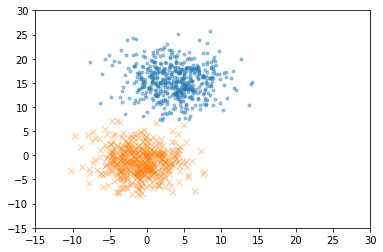

In [2]:
# Sample
X = gaussian.rvs(0,1,(2,500)) # generate 2x1000 standard normal (y,x)
V = X + np.array([[2],[4]]) # shift
X[:,:] *= 3 
X -= np.array([[1],[1.5]])
# Rotate Matrix 
f = +pi/14

R = array([[cos(f),-sin(f)],
           [sin(f), cos(f)]]) 
# Rotate
V = R.dot(V)*3.5

# plot
# figure(figsize=(5,5)); 
a,b = 15,30
xlim(-a,b);
ylim(-a,b);
plot(V[0,:],V[1,:], '.', alpha=0.4) ;
plot(X[0,:],X[1,:], 'x', alpha=0.4) ;

In [3]:
X = np.concatenate((X,V),axis=1)
Y = np.concatenate((np.zeros((1,500)),np.ones((1,500))),axis=1)

In [4]:
shape(Y.T)

(1000, 1)

In [150]:
def logistic(y, x, w = None, reg = None):
    
    i = 0
    maxIter = 1500
    alpha, count = 0.1, 0
    
    # reshape x
    X = np.insert(x, 0, 1, axis=1)
    size, predictors = shape(X)
    
    
    if w == None:
        w = np.zeros(predictors)
        
    if not reg:
        C, R = 0.0, 1.0
    else :
        C = 5.0
    
    while (i < maxIter) : # and abs(sum(w)) < predictors*5 :
        i += 1
           
        for j in xrange(size) : 
            
            try:
                expect_value = 1.0/(1+math.exp(-X[j].dot(w)))
                true_value = y[j]
            except:
                expect_value = 0.0
                true_value = y[j]
            
            if reg == "l1":
                R = sign(w[1:])
            elif reg == "l2":
                R = w[1:]
                
            w[0] = w[0] - alpha * ( expect_value - true_value )*X[j][0]
            w[1:] = w[1:] - alpha * (( expect_value - true_value )*X[j][1:] + 2*C*R)
            
            alpha /= (1 + alpha**2) # arctangent convergence
            
            
    return w
    
    

In [151]:
w_hat = logistic(Y.T,X.T)
w_hat

array([-8.09564115,  0.32216065,  1.17959806])

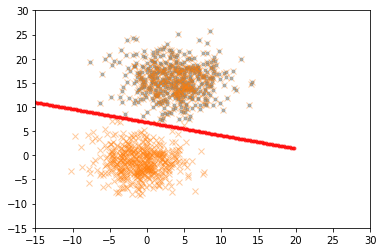

In [152]:
a,b = 15,30
xlim(-a,b);
ylim(-a,b);
plot(V[0,:],V[1,:], '.', alpha=0.4) ;
plot(X[0,:],X[1,:], 'x', alpha=0.4) ;

orderx = np.arange(-15.,20.,0.2)
# Boundary - w^Tx = 0
plot(orderx,(- orderx*w_hat[1] - w_hat[0])/w_hat[2], 'r.', alpha = 0.6 ) ;

In [153]:
w_hat = logistic(Y.T,X.T,reg = "l1")
w_hat

array([ 0.03588612, -0.00158236,  0.01043551])

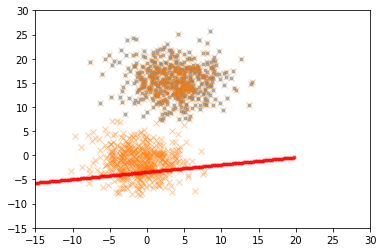

In [154]:
a,b = 15,30
xlim(-a,b);
ylim(-a,b);
plot(V[0,:],V[1,:], '.', alpha=0.4) ;
plot(X[0,:],X[1,:], 'x', alpha=0.4) ;

orderx = np.arange(-15.,20.,0.2)
# Boundary - w^Tx = 0
plot(orderx,(- orderx*w_hat[1] - w_hat[0])/w_hat[2], 'r.', alpha = 0.6 ) ;

In [155]:
w_hat = logistic(Y.T,X.T,reg = "l2")
w_hat

array([-1.3814634 ,  0.04868628,  0.20181078])

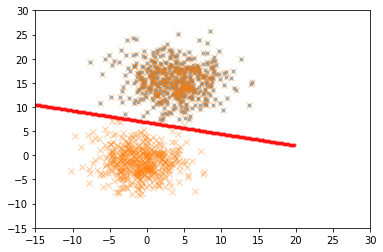

In [156]:
a,b = 15,30
xlim(-a,b);
ylim(-a,b);
plot(V[0,:],V[1,:], '.', alpha=0.4) ;
plot(X[0,:],X[1,:], 'x', alpha=0.4) ;

orderx = np.arange(-15.,20.,0.2)
# Boundary - w^Tx = 0
plot(orderx,(- orderx*w_hat[1] - w_hat[0])/w_hat[2], 'r.', alpha = 0.6 ) ;